<a href="https://colab.research.google.com/github/mohamed-arif-nather/RAG/blob/main/rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PDF Loader

In [ ]:
!pip install langchain-community --quiet
!pip install pypdf --quiet

In [ ]:
from langchain.document_loaders import PyPDFLoader

In [ ]:
loader = PyPDFLoader("/content/embedded-systems.pdf")
pdf_pages = loader.load()

In [ ]:
pdf_pages[0]

Document(metadata={'producer': 'Acrobat Distiller 4.0 for Windows', 'creator': 'PyPDF', 'creationdate': '1999-05-17T00:46:04+00:00', 'moddate': '2004-07-22T18:57:31+03:00', 'source': '/content/embedded-systems.pdf', 'total_pages': 209, 'page': 0, 'page_label': '1'}, page_content='Embedded Systems Design: An Introduction to Processes, Tools, and \nTechniques \nby Arnold S. Berger ISBN: 1578200733 \nCMP Books © 2002 (237 pages) \nAn easy-to-understand guidebook for those embarking upon an embedded \nprocessor development project.  \n \n \nTable of Contents  \n \n \nEmbedded Systems Design—An Introduc tion to Processes, Tools, and \nTechniques  \n Preface  \n Introduction  \n Chapter 1 - The Embedded Design Life Cycle \n Chapter 2 - The Selection Process \n Chapter 3 - The Partitioning Decision \n Chapter 4 - The Development Environment \n Chapter 5 - Special Software Techniques \n Chapter 6 - A Basic Toolset \n Chapter 7 - BDM, JTAG, and Nexus \n Chapter 8 - The ICE — An Integrated Solut

##Youtube Loader

In [ ]:
!pip install yt_dlp --quiet
!pip install pydub --quiet
!pip install faster-whisper --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 659.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
from langchain.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.parsers.audio import FasterWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [ ]:
url="https://www.youtube.com/watch?v=uFhDGagZzjs"

save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    FasterWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=uFhDGagZzjs
[youtube] uFhDGagZzjs: Downloading webpage
[youtube] uFhDGagZzjs: Downloading tv client config
[youtube] uFhDGagZzjs: Downloading player 6074d4a4-main
[youtube] uFhDGagZzjs: Downloading tv player API JSON
[youtube] uFhDGagZzjs: Downloading ios player API JSON
[youtube] uFhDGagZzjs: Downloading m3u8 information
[info] uFhDGagZzjs: Downloading 1 format(s): 140-5
[download] Destination: docs/youtube//Lecture 01： Introduction to Embedded Systems.m4a
[download] 100% of   27.29MiB in 00:00:03 at 8.25MiB/s   
[FixupM4a] Correcting container of "docs/youtube//Lecture 01： Introduction to Embedded Systems.m4a"
[ExtractAudio] Not converting audio docs/youtube//Lecture 01： Introduction to Embedded Systems.m4a; file is already in target format m4a


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

vocabulary.json: 0.00B [00:00, ?B/s]

model.bin:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

In [ ]:
docs[1]

Document(metadata={'source': 'docs/youtube/Lecture 01： Introduction to Embedded Systems.m4a', 'timestamps': '[24.44s -> 30.70s]', 'language': 'en', 'probability': '100%'}, page_content=' Dutta. Now in this course we shall be talking about')

In [ ]:
len(docs)

285

In [ ]:
len(pdf_pages)

209

In [ ]:
combined_docs = pdf_pages + docs

In [ ]:
len(combined_docs)

494

In [ ]:
combined_docs = pdf_pages

##Chunking

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
chunk_size = 1024
chunk_overlap = 200

In [ ]:
splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [ ]:
chunked_docs = splitter.split_documents(combined_docs)

In [ ]:
len(chunked_docs)

678

##Embeddings

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings

In [ ]:
multilingual_embeddings = HuggingFaceEmbeddings(model_name='intfloat/multilingual-e5-large')

/tmp/ipython-input-1839380797.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  multilingual_embeddings = HuggingFaceEmbeddings(model_name='intfloat/multilingual-e5-large')


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

##Vector DB - Chroma

In [ ]:
!pip install chromadb --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 592.3 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 8.5 MB/s e

In [ ]:
from langchain.vectorstores import Chroma

In [ ]:
persist_directory = "/db/chroma/"

In [ ]:
vectordb = Chroma.from_documents(
    documents=chunked_docs,
    embedding=multilingual_embeddings,
    persist_directory=persist_directory
)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
question = "How to do testing in Embedded systems?"

In [ ]:
vectordb.similarity_search(question, k=3)

[Document(metadata={'page': 156, 'creator': 'PyPDF', 'moddate': '2004-07-22T18:57:31+03:00', 'producer': 'Acrobat Distiller 4.0 for Windows', 'source': '/content/embedded-systems.pdf', 'creationdate': '1999-05-17T00:46:04+00:00', 'page_label': '157', 'total_pages': 209}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniqu

In [ ]:
vectordb.similarity_search_with_score(question, k=3)

[(Document(metadata={'page': 156, 'producer': 'Acrobat Distiller 4.0 for Windows', 'moddate': '2004-07-22T18:57:31+03:00', 'page_label': '157', 'total_pages': 209, 'creator': 'PyPDF', 'source': '/content/embedded-systems.pdf', 'creationdate': '1999-05-17T00:46:04+00:00'}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniq

##Retrieval

In [ ]:
vectordb.max_marginal_relevance_search(question, k=3, fetch_k=10)

[Document(metadata={'source': '/content/embedded-systems.pdf', 'creator': 'PyPDF', 'page': 156, 'total_pages': 209, 'creationdate': '1999-05-17T00:46:04+00:00', 'producer': 'Acrobat Distiller 4.0 for Windows', 'moddate': '2004-07-22T18:57:31+03:00', 'page_label': '157'}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniqu

##Meta data filtering

In [ ]:
vectordb.similarity_search(
    question,
    k=3,
    filter={"source":"/content/embedded-systems.pdf"}
)

[Document(metadata={'source': '/content/embedded-systems.pdf', 'creator': 'PyPDF', 'creationdate': '1999-05-17T00:46:04+00:00', 'moddate': '2004-07-22T18:57:31+03:00', 'page': 156, 'producer': 'Acrobat Distiller 4.0 for Windows', 'total_pages': 209, 'page_label': '157'}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniqu

##Groq

In [ ]:
!pip install langchain-groq --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 777.7 kB/s eta 0:00:00


In [ ]:
import getpass
import os

if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")


Enter your Groq API key: ··········


In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=250,
)

In [ ]:
response = llm.invoke("Write a poem about nature")

In [ ]:
response.content

"In twilight's hush, where shadows play,\nThe forest whispers secrets of the day.\nThe trees, like sentinels of old,\nStand guard, their leaves a rustling gold.\n\nThe wind, a gentle lover's sigh,\nStirs the grass, and the wildflowers high.\nTheir petals dance, a colorful throng,\nAs the sun's warm touch brings life to song.\n\nThe river's voice, a soothing sound,\nEchoes through the valleys all around.\nIts waters flow, a winding stream,\nReflecting the beauty of the dream.\n\nThe mountains rise, a majestic sight,\nTheir peaks, a challenge to the light.\nThe eagles soar, a regal flight,\nTheir cries, a symphony of delight.\n\nThe stars appear, a twinkling show,\nA celestial tapestry, aglow.\nThe moon, a glowing crescent smile,\nIlluminates the night's dark mile.\n\nIn nature's arms, we find our peace,\nA sense of calm, a world to cease.\nFrom the earth's rhythms, we take our cue,\nTo live in harmony, anew.\n\nSo let us cherish this world we share,\nAnd honor nature's beauty, beyond co

##Prompt Engineering

In [ ]:
system_prompt = (
        "You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question."
        "If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise."
        "Answer all questions to the best of your ability."
)

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

In [ ]:
system_message = [SystemMessage(content = system_prompt)]

In [ ]:
question = "How to do testing in Embedded systems?"

In [ ]:
vectordb.similarity_search(question, k=3)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


[Document(metadata={'creator': 'PyPDF', 'producer': 'Acrobat Distiller 4.0 for Windows', 'page': 156, 'moddate': '2004-07-22T18:57:31+03:00', 'creationdate': '1999-05-17T00:46:04+00:00', 'total_pages': 209, 'source': '/content/embedded-systems.pdf', 'page_label': '157'}, page_content='Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details uniqu

In [ ]:
docs = vectordb.similarity_search_with_score(question, k=5)

In [ ]:
import pandas as pd

_docs = pd.DataFrame(
    [(question, doc[0].page_content, doc[0].metadata.get('source'), doc[0].metadata.get('page'), doc[1]) for doc in docs],
    columns=['query', 'paragraph', 'document', 'page_number', 'relevant_score']
)

In [ ]:
_docs

,query,paragraph,document,page_number,relevant_score
0,How to do testing in Embedded systems?,Chapter 9: Testing \nEmbedded systems software...,/content/embedded-systems.pdf,156,0.263262
1,How to do testing in Embedded systems?,chosen based on a guess about what errors are ...,/content/embedded-systems.pdf,163,0.278990
2,How to do testing in Embedded systems?,some way to measure how well our tests are cov...,/content/embedded-systems.pdf,165,0.283979
3,How to do testing in Embedded systems?,"application ran long enough, the PC would run ...",/content/embedded-systems.pdf,27,0.293681
4,How to do testing in Embedded systems?,"95 Sr-1, 98, and 98 SE. After blaming Microsof...",/content/embedded-systems.pdf,27,0.296775


In [ ]:
context = "\n\n".join(_docs['paragraph'])

In [ ]:
context

'Chapter 9: Testing \nEmbedded systems software testing shares much in common with application \nsoftware testing. Thus, much of this chapter is a summary of basic testing \nconcepts and terminology. However, some important differences exist between \napplication testing and embedded systems testing. Embedded developers often \nhave access to hardware-based test tools that are generally not used in application \ndevelopment. Also, embedded systems often have unique characteristics that \nshould be reflected in the test plan. These differences tend to give embedded \nsystems testing its own distinctive flavor. This chapter covers the basics of testing \nand test case development and points out details unique to embedded systems \nwork along the way. \nWhy Test? \nBefore you begin designing tests, it’s important to have a clear understanding of \nwhy you are testing. This understanding influences which tests you stress and \n(more importantly) how early you begin testing. In general, you

In [ ]:
human_message = [HumanMessage(content = context + question)]

In [ ]:
result = llm.invoke(system_message + human_message)

In [ ]:
result.content

'Embedded systems testing involves several steps and techniques, including:\n\n1. Identifying the unique characteristics of the embedded system and reflecting them in the test plan.\n2. Using hardware-based test tools, such as emulators and integrated device electronics (IDE), to simulate real-world scenarios.\n3. Developing test cases that cover all aspects of the system, including reliability, performance, and safety.\n4. Measuring test coverage using techniques such as code coverage analysis and fault injection.\n5. Testing for long periods of time to ensure the system can run reliably without crashing.\n\nIt\'s also recommended to have a separate team of engineers and technicians perform the testing to ensure objectivity and prevent a "circle the wagons" mentality.'

In [ ]:
question = "What are ICs"

In [ ]:
docs = vectordb.similarity_search_with_score(question, k=5)

_docs = pd.DataFrame(
    [(question, doc[0].page_content, doc[0].metadata.get('source'), doc[0].metadata.get('page'), doc[1]) for doc in docs],
    columns=['query', 'paragraph', 'document', 'page_number', 'relevant_score']
)

context = "\n\n".join(_docs['paragraph'])

human_message = [HumanMessage(content = context + question)]
response = llm.invoke(system_message + human_message)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
response.content

'ICs, or Integrated Circuits, are electronic components that contain a large number of tiny transistors and other components on a single small chip of semiconductor material, such as silicon. They are used to perform a wide range of functions, including processing, memory, and input/output operations.'

In [ ]:
context

'Modern IC technology is changing that fact rapidly. \nNot too long ago, companies such as Silicon Graphics and Floating Point Systems \nmade extremely expensive and complex hardware boxes that would plug into your \nDEC VAX or Data General Nova, and perform the hardware graphics and floating-\npoint support that is now taken for granted in every desktop computer. Today, you \ncan put entire systems on a single IC large enough, quantities of which can cost \nonly a few dollars. \nFor example, AMD now produces a complete PC on a single chip, the SC520. The \nSC520 is designed around a 486 microprocessor “core” with all the peripheral \ndevices that you might find in your desktop PC. Many of today’s amazingly small \nand powerful communication and computing devices — such as PDAs, cell phones, \ndigital cameras, MPEG players and so on — owe their existence to ASIC technology \nand systems-on-silicon. \n \nFigure 3.1 shows how board-level designs are migrated to both a group of ASIC\n\nDe

In [ ]:
!pip install langgraph --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 563.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

workflow = StateGraph(state_schema=MessagesState)
def call_model(state: MessagesState):
    system_prompt = (
        "You are a helpful assistant."
        "Answer all questions to the best of your ability."
    )
    # Prepend the system message to the current conversation history
    messages = [SystemMessage(content=system_prompt)] + state["messages"]
    response = llm.invoke(messages)
    return {"messages": response}

# Re-initialize the workflow before adding the node
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")

# Add simple in-memory checkpointer for conversation history
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

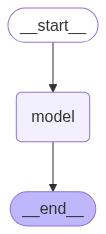

In [ ]:
app

In [ ]:
app.invoke(
    {"messages":[HumanMessage(content="Translate to French: i love programming.")]},
    config={"configurable":{"thread_id":"1"}},
    )

{'messages': [HumanMessage(content='Translate to French: i love programming.', additional_kwargs={}, response_metadata={}, id='e62669b9-c44b-4d09-b1c0-53e6d7a42b5c'),
  AIMessage(content='The translation of "I love programming" to French is:\n\n"J\'adore le programmation."\n\nHowever, a more common and idiomatic way to express this in French would be:\n\n"Je suis amoureux de la programmation" (I am in love with programming) or\n\n"Je adore programmer" (I love to program).', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 59, 'total_tokens': 130, 'completion_time': 0.129380689, 'prompt_time': 0.084659395, 'queue_time': 0.049347417, 'total_time': 0.214040084}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f1d6f31f-122b-4304-8e25-27980c7b6dd9-0', usage_metadata={'input_tokens': 59, 'output_tokens': 71, 'total_tokens': 130})]}

In [ ]:
app.invoke(
    {"message":[HumanMessage(content="what did i ask you")]},
    config={"configurable":{"thread_id":"1"}},
    )

{'messages': [HumanMessage(content='Translate to French: i love programming.', additional_kwargs={}, response_metadata={}, id='e62669b9-c44b-4d09-b1c0-53e6d7a42b5c'),
  AIMessage(content='The translation of "I love programming" to French is:\n\n"J\'adore le programmation."\n\nHowever, a more common and idiomatic way to express this in French would be:\n\n"Je suis amoureux de la programmation" (I am in love with programming) or\n\n"Je adore programmer" (I love to program).', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 59, 'total_tokens': 130, 'completion_time': 0.129380689, 'prompt_time': 0.084659395, 'queue_time': 0.049347417, 'total_time': 0.214040084}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f1d6f31f-122b-4304-8e25-27980c7b6dd9-0', usage_metadata={'input_tokens': 59, 'output_tokens': 71, 'total_tokens': 130}),
  